## About Dataset

Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to WebMD, "about 5 million Americans need a blood transfusion every year".

Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.

Uploaded on Kaggle by MOHD SHABBIRUDIN KHAN MIFTAHI 

Import Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
transfusion_df = pd.read_csv("C:/Users/user/Documents/Projects/transfusion.csv")

**Exploratory Data Analysis**

In [3]:
transfusion_df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
transfusion_df.shape #Dataset has 4 features(target feature makes it five) and 748 samples

(748, 5)

In [5]:
transfusion_df.info() # Give summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [6]:
transfusion_df.isnull().sum() #To check if there are null values in the dataset

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
transfusion_df.describe() #Statistical summary of dataset

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


array([[<AxesSubplot:title={'center':'Recency (months)'}>,
        <AxesSubplot:title={'center':'Frequency (times)'}>],
       [<AxesSubplot:title={'center':'Monetary (c.c. blood)'}>,
        <AxesSubplot:title={'center':'Time (months)'}>],
       [<AxesSubplot:title={'center':'whether he/she donated blood in March 2007'}>,
        <AxesSubplot:>]], dtype=object)

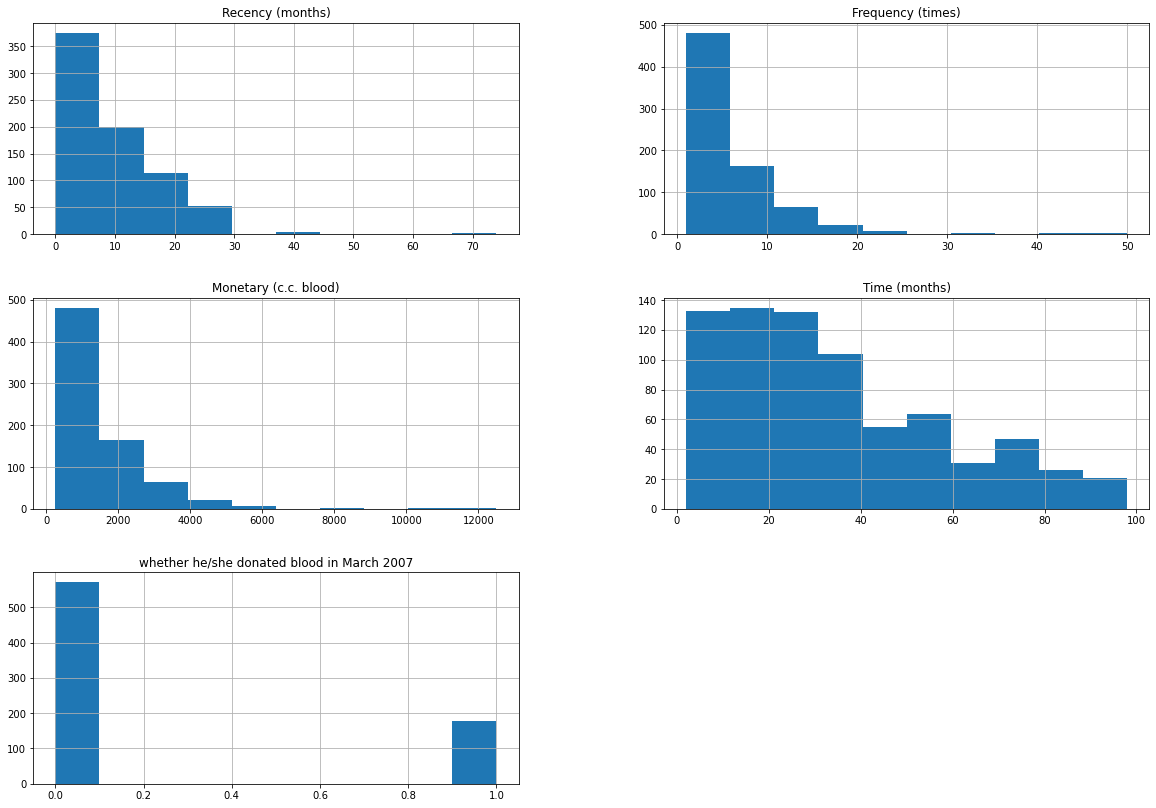

In [8]:
transfusion_df.hist(figsize = (20,14)) # Histogram of the distribution of features

Text(0.5, 1.0, 'A pairplot of the relationship of the features and the target')

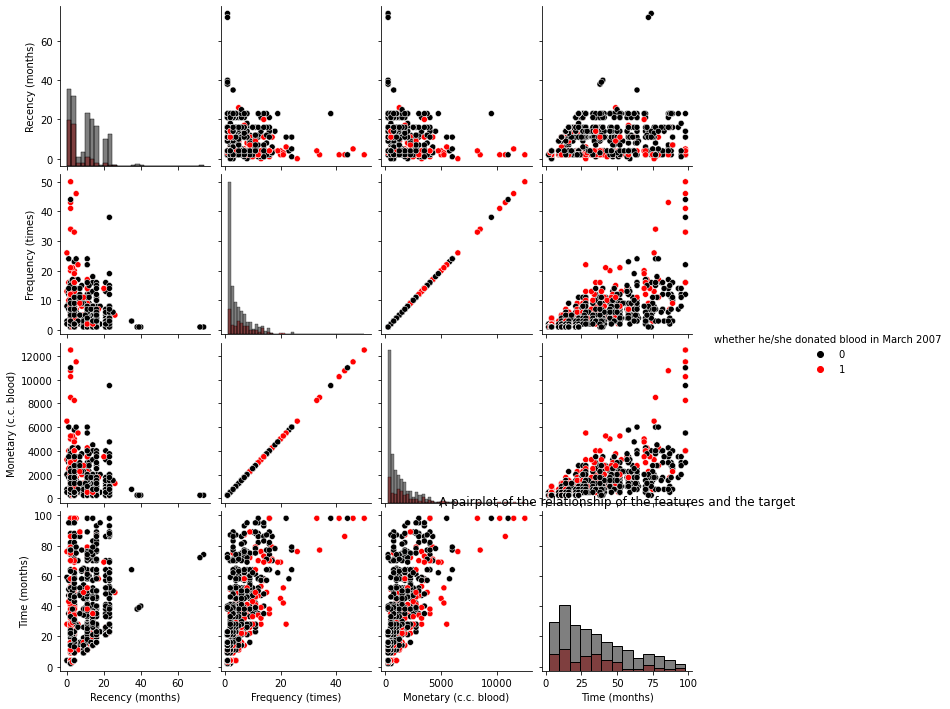

In [9]:
# Pairplot of the relationship of the features with the target

import seaborn as sns
import matplotlib.pyplot as plt

feature_columns = ["Recency (months)","Frequency (times)","Monetary (c.c. blood)","Time (months)"]
target_column = "whether he/she donated blood in March 2007"

sns.pairplot(data = transfusion_df, vars = feature_columns, hue = target_column, diag_kind = "hist", palette ={0:"black",1:"red"})
plt.title("A pairplot of the relationship of the features and the target")



In [10]:
#Separation  of features and target
data,target = transfusion_df.drop(columns = target_column), transfusion_df[target_column]

In [11]:
data.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28


In [12]:
target.head(2)

0    1
1    1
Name: whether he/she donated blood in March 2007, dtype: int64

**Model Selection**

a. Classification Model Pipelines

In [13]:
#1. Logistic Regression (Note with Logistic regression feature scaling is necessary)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_classifier = make_pipeline(StandardScaler(), LogisticRegression())

In [14]:
#2. Support Vector Classifier(Feature Scaling is also necessary for this algorithm)

from sklearn.svm import SVC 

svc_classifier = make_pipeline(StandardScaler(),SVC())

In [15]:
#3. Decsion Tree Classifier(Feature scaling is not necessary for Decision trees and Ensembles)
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()

In [16]:
#4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rm_classifier = RandomForestClassifier()

In [17]:
#5. Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier()

b. Hyperparamenter Tuning and Generalization Performance

In [18]:
# Baseline Generalization Perfomance(Dummy Classifier with "most frequent" as strategy)
#for cross validation,Stratified K Fold will be used for the splitting of data

from sklearn.model_selection import StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

dummy_classifier = DummyClassifier()

scoring = ['accuracy', 'balanced_accuracy']
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state= 0)

cv_results = cross_validate(dummy_classifier, data, target, cv = cv, scoring = scoring)
cv_results

{'fit_time': array([0.00099993, 0.00099993, 0.00200009, 0.0010004 , 0.00099993,
        0.00200009, 0.00100017, 0.00800061, 0.00099993, 0.00100017]),
 'score_time': array([0.00200009, 0.00200009, 0.00099993, 0.00199986, 0.00200009,
        0.00100017, 0.00199986, 0.00200009, 0.00200009, 0.00200009]),
 'test_accuracy': array([0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
        0.76      , 0.76      , 0.76      , 0.77027027, 0.77027027]),
 'test_balanced_accuracy': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])}

In [19]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T

In [20]:


print(f"The Accuracy score of Dummy Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of Dummy Classifier is: 0.762 +/- 0.004


In [21]:
print(f"The Balanced Accuracy score of Dummy Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of Dummy Classifier is: 0.500 +/- 0.000


In [22]:
#hyperparameter tuning of logistic classifier and cross-validation

logistic_classifier.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__C':[0.01,0.1,1,10,100],
             'logisticregression__penalty':['l1','l2']}
grid_log_classifier = GridSearchCV(logistic_classifier, param_grid = param_grid, cv = cv, n_jobs = 2)

cv_results = cross_validate(grid_log_classifier, data, target, cv = cv, scoring = scoring)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76966637        nan 0.7666813         nan 0.76968832
        nan 0.76968832        nan 0.76968832]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76819579        nan 0.77115891        nan 0.76670325
        nan 0.76968832        nan 0.76968832]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76968832        nan 0.76968832        nan 0.77265145
        nan 0.77265145        nan 0.77265145]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.76819579        nan 0.769622

In [24]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T

In [25]:
print(f"The Accuracy score of the tuned Logistic Regression Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of the tuned Logistic Regression Classifier is: 0.771 +/- 0.024


In [26]:
print(f"The Balanced Accuracy score of the tuned Logistic Regression Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of the tuned Logistic Regression Classifier is: 0.545 +/- 0.038


In [27]:
svc_classifier.get_params() #Gives a dictionary of hyperparameters in the pipeline 

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [28]:
param_grid = {'svc__C':[0.1,1,10,100],
             'svc__gamma':[0.1,1,10]}
grid_svc_classifier = GridSearchCV(svc_classifier, param_grid = param_grid, cv = cv, n_jobs = 2)

cv_results = cross_validate(grid_svc_classifier, data, target, cv = cv, scoring = scoring)

In [29]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T

In [30]:
scores

,Accuracy,Balanced accuracy
0,0.760000,0.614035
1,0.800000,0.659357
2,0.826667,0.695906
3,0.853333,0.713450
4,0.786667,0.555556
5,0.733333,0.558480
6,0.813333,0.687135
7,0.773333,0.565789
8,0.797297,0.641383
9,0.756757,0.532508


In [31]:
print(f"The Accuracy score of the tuned Support Vector Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of the tuned Support Vector Classifier is: 0.790 +/- 0.036


In [32]:
print(f"The Balanced Accuracy score of the tuned Support Vector Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of the tuned Support Vector Classifier is: 0.622 +/- 0.066


In [33]:
#Hyperparameter tuning for Decision Tree Classifier and Cross Validation

tree_classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth':[2,4,6,8,10]}
grid_tree_classifier = GridSearchCV(tree_classifier, param_grid = param_grid, cv = cv, n_jobs = 2)

cv_results = cross_validate(grid_tree_classifier, data, target, cv = cv, scoring = scoring)

In [35]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T

In [36]:
scores

,Accuracy,Balanced accuracy
0,0.773333,0.641813
1,0.840000,0.761696
2,0.786667,0.650585
3,0.840000,0.704678
4,0.746667,0.548246
5,0.706667,0.597953
6,0.760000,0.576023
7,0.866667,0.779240
8,0.729730,0.597523
9,0.716216,0.588751


In [37]:
print(f"The Accuracy score of the tuned Decision Tree Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of the tuned Decision Tree Classifier is: 0.777 +/- 0.056


In [38]:
print(f"The Balanced Accuracy score of the tuned Decision Tree Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of the tuned Decision Tree Classifier is: 0.645 +/- 0.080


In [39]:
#Hyperparamter tuning of Random Forest Classifier and Cross Validation

rm_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
param_grid = {'n_estimators':[10,50,100,1000],
             'max_depth':[2,4,6,8,10]}
grid_rm_classifier = GridSearchCV(rm_classifier, param_grid = param_grid, cv = cv, n_jobs = 2)

cv_results = cross_validate(grid_rm_classifier, data, target, cv = cv, scoring = scoring)

In [41]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T
scores

,Accuracy,Balanced accuracy
0,0.760000,0.614035
1,0.826667,0.714912
2,0.813333,0.668129
3,0.840000,0.685673
4,0.760000,0.538012
5,0.720000,0.568713
6,0.773333,0.584795
7,0.773333,0.584795
8,0.716216,0.568111
9,0.756757,0.573787


In [42]:
print(f"The Accuracy score of the tuned Random Forest Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of the tuned Random Forest Classifier is: 0.774 +/- 0.042


In [43]:
print(f"The Balanced Accuracy score of the tuned Random Forest Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of the tuned Random Forest Classifier is: 0.610 +/- 0.059


In [44]:
#Hyperparamter tuning of Gradient Boosting Classifier and Cross Validation

gb_classifier.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
param_grid = {'n_estimators':[10,50,100,1000],
             'learning_rate':[0.01,0.1,0.5,1]}
grid_gb_classifier = GridSearchCV(gb_classifier, param_grid = param_grid, cv = cv, n_jobs = 2)

cv_results = cross_validate(grid_gb_classifier, data, target, cv = cv, scoring = scoring)

In [46]:
scores = pd.DataFrame(
    [cv_results["test_accuracy"], cv_results["test_balanced_accuracy"]],
    index=["Accuracy", "Balanced accuracy"]
).T
scores

,Accuracy,Balanced accuracy
0,0.746667,0.586257
1,0.866667,0.741228
2,0.760000,0.519006
3,0.760000,0.500000
4,0.746667,0.510234
5,0.706667,0.578947
6,0.786667,0.612573
7,0.813333,0.668129
8,0.729730,0.576883
9,0.756757,0.553148


In [47]:
print(f"The Accuracy score of the tuned Gradient Boosting Classifier is: {scores['Accuracy'].mean():.3f} +/- {scores['Accuracy'].std():.3f}")

The Accuracy score of the tuned Gradient Boosting Classifier is: 0.767 +/- 0.045


In [48]:
print(f"The Balanced Accuracy score of the tuned Gradient Boosting Classifier is: {scores['Balanced accuracy'].mean():.3f} +/- {scores['Balanced accuracy'].std():.3f}")

The Balanced Accuracy score of the tuned Gradient Boosting Classifier is: 0.585 +/- 0.075


Decision Tree Classifier has the highest balanced accuracy score and should be the best model since there is inbalance in the class.

Further Evaluation of Decision Tree Classifier

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

target_pred = cross_val_predict(grid_tree_classifier, data, target, cv=cv)
conf_mat = confusion_matrix(target, target_pred)


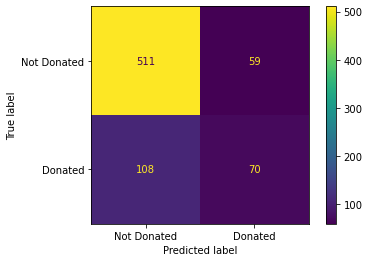

In [58]:
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['Not Donated','Donated'])
cmd.plot()


In [61]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(target, target_pred, pos_label=1)
recall = recall_score(target, target_pred, pos_label=1)

print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Precision score: 0.543
Recall score: 0.393
